In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


C:\Users\win\AppData\Local\Temp\ipykernel_12832\3929838012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='duration_category', palette='viridis')


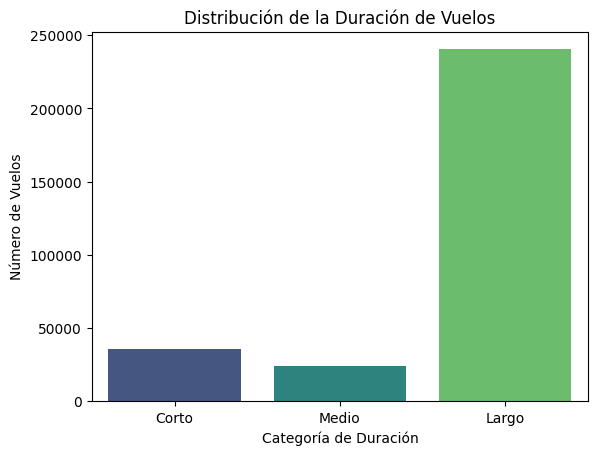

In [16]:
#1 Grafico univariado de distribucion
#Analiza una sola variable, para entender como se
#distribuyen sus valores dentro del conjunto de datos.
bins = [0, 3, 6, df["duration"].max()]
labels = ['Corto', 'Medio', 'Largo']
df['duration_category'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

sns.countplot(data=df, x='duration_category', palette='viridis')
plt.title('Distribución de la Duración de Vuelos')
plt.xlabel('Categoría de Duración')
plt.ylabel('Número de Vuelos')
plt.show()

C:\Users\win\AppData\Roaming\Python\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\win\AppData\Roaming\Python\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


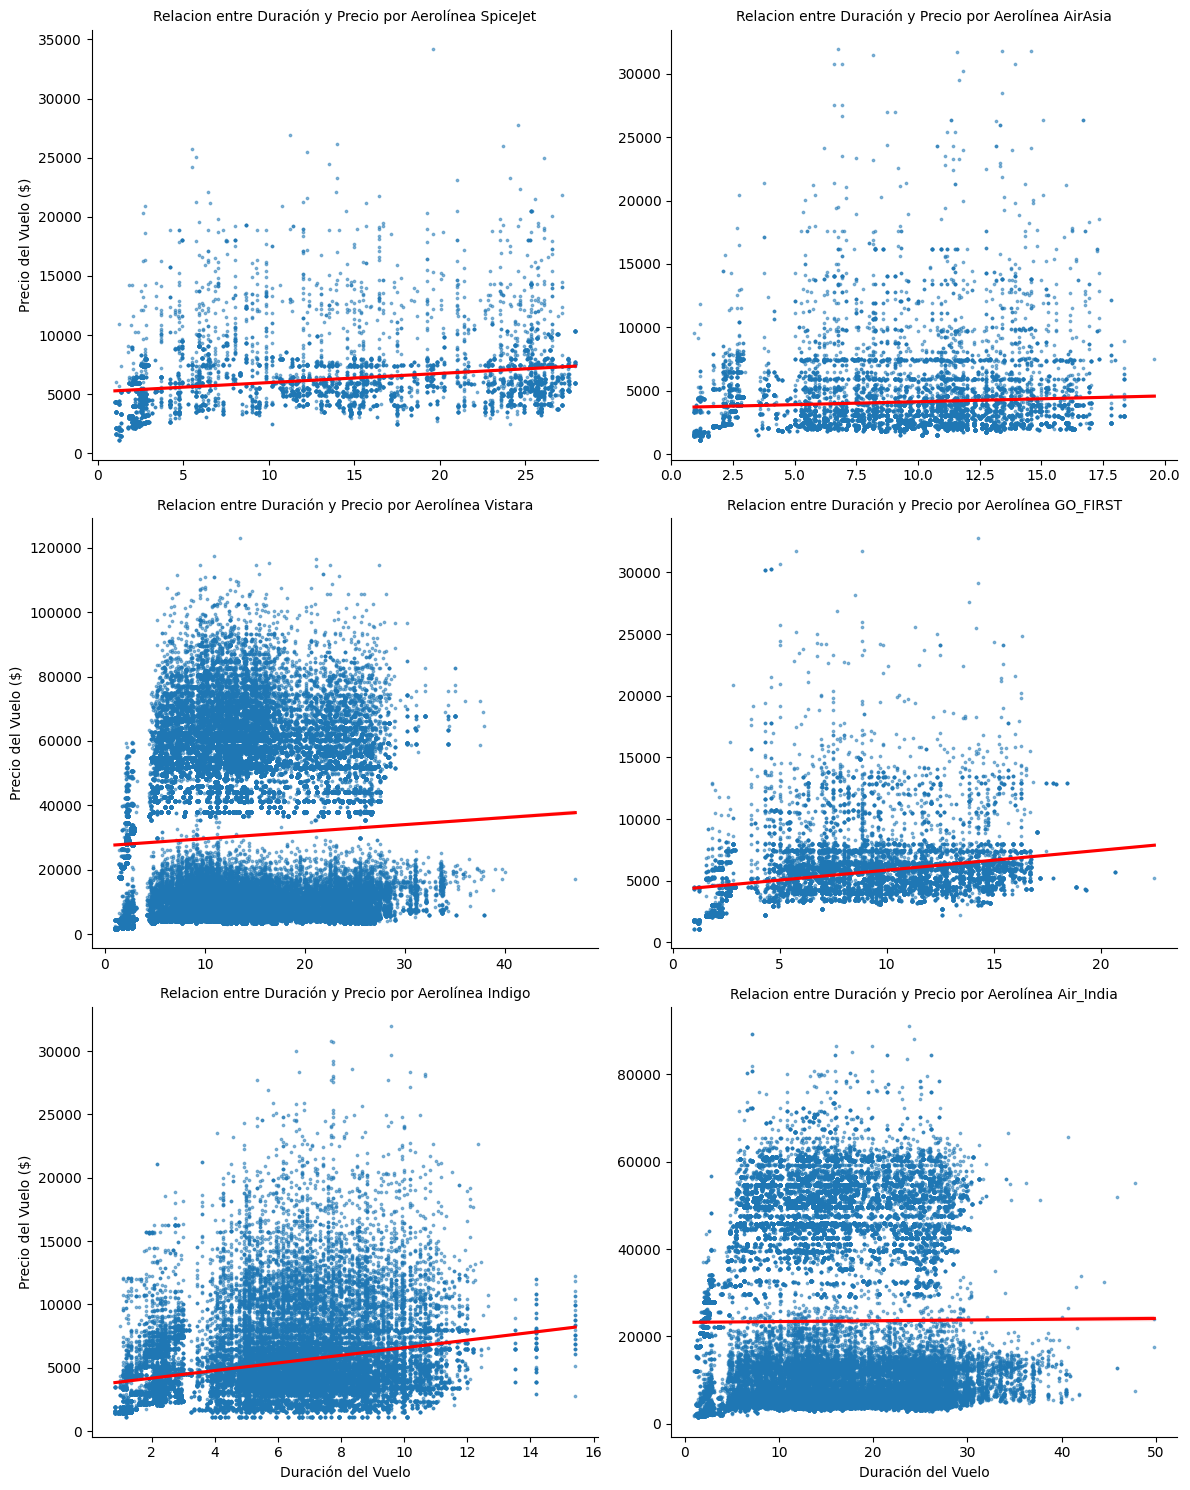

In [55]:
#2 Grafico bivariado de relacion
#Analiza la relación entre dos variables
g = sns.lmplot(data=df, x="duration", y="price", col="airline", col_wrap=2
            , height=5, aspect=1.2, scatter_kws={'alpha':0.5, 's':3}, 
            line_kws={'color':'red'}, sharex=False, sharey=False)
g.set_titles('Relacion entre Duración y Precio por Aerolínea {col_name}')
g.set_axis_labels('Duración del Vuelo', 'Precio del Vuelo ($)')
g.tight_layout()
plt.show()


C:\Users\win\AppData\Local\Temp\ipykernel_12832\3114540853.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='airline', y='price', palette='viridis', ci=None, hue="class")


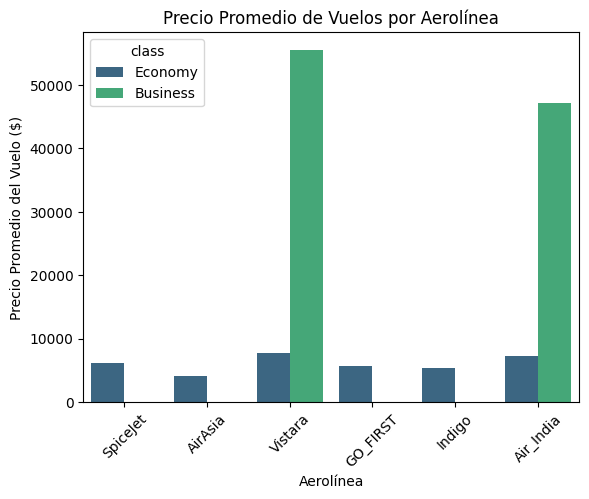

In [40]:
#3 Grafico de comparacion categorica
sns.barplot(data=df, x='airline', y='price', palette='viridis', ci=None, hue="class")
plt.title('Precio Promedio de Vuelos por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precio Promedio del Vuelo ($)')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Matriz de Correlación de Variables Numéricas')

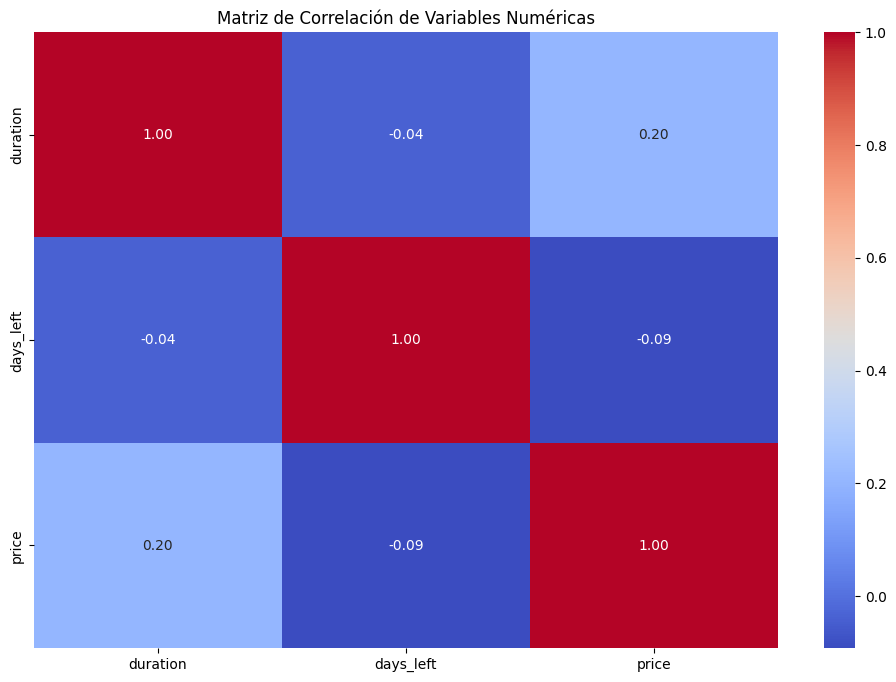

In [33]:
#4 Grafico de correlacion multivariada
df.drop(columns=['index'], inplace=True)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')

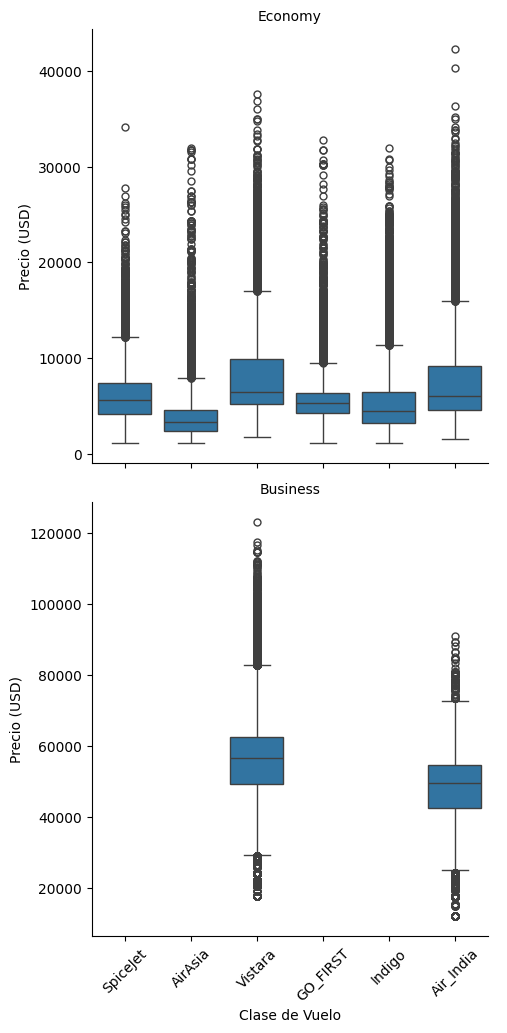

In [54]:
#5 Grafico resumen con interpretacion estadistica

g2 = sns.catplot(kind="box", data=df, x="airline", y="price", col="class", col_wrap=1,
                height=5, sharey=False)
g2.set_axis_labels("Clase de Vuelo", "Precio (USD)")
g2.set_titles("{col_name}")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Visualizacion dinamica